In [27]:
'''Principal Component Analysis (PCA)'''
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor
from scipy.spatial.transform import Rotation

In [30]:
"""singular value decomposition (SVD) decomposes the training 
set matrix X into the matrix multiplication of three matrices
U Σ V⊺, where V has the unit vectors that define all the 
principal components"""
# Center data and perform SVD
m = 100
x = np.zeros((m,3))
angles = (np.random.rand(m) ** 3 + 0.6) * 3 * np.pi  # uneven distribution
x[:, 0], x[:, 1] = np.cos(angles), np.sin(angles) * 0.6  # oval
x += 0.35 * np.random.randn(m, 3)  # add more noise
x = Rotation.from_rotvec([np.pi / 27, -np.pi / 18, np.pi / 3]).apply(x)
x += [0.3, 0, 0.3] 
u,s,vh = np.linalg.svd(x_centered)
vh[2],x_centered.shape

(array([0., 0., 1.]), (100, 3))

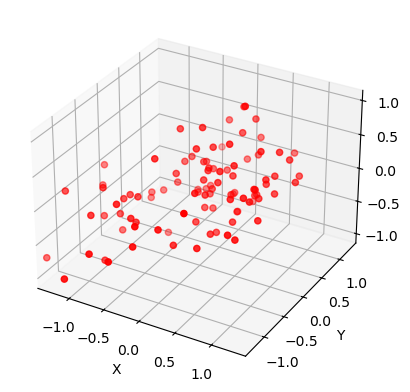

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x_centered = x - x.mean(axis=0)
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x_centered[:,0], x_centered[:,1], x_centered[:,2],color='red')
axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show plot
plt.show()

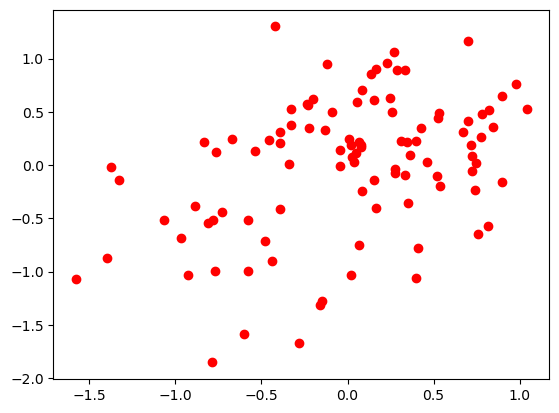

In [35]:
# matrix containing the first 2 columns of vh:
w2 = vh[:2].T
# projects the training set on the plane defined by the first 2 principal components:
x_2d = x_centered @ w2
plt.scatter(x_centered[:,0], x_centered[:,1],color='red')
plt.show()

In [34]:
x_2d.shape

(100, 2)

In [38]:
# or we can use Scikit-Learn:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_2d2 = pca.fit_transform(x)

In [41]:
np.all(x_2d2 == x_2d)

False

In [42]:
pca.components_

array([[-0.61769765, -0.74510595, -0.25152878],
       [-0.72542583,  0.66336142, -0.18360009]])

In [43]:
pca.explained_variance_ratio_

array([0.62128561, 0.25351018])

In [55]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
x_train, y_train = mnist.data[:61_000], mnist.target[:61_000]
x_test, y_test = mnist.data[61_000:], mnist.target[61_000:]

pca = PCA()
pca.fit(x_train)
cum_sum = np.cumsum(pca.explained_variance_ratio_)
dims = np.argmax(cum_sum >= 0.95) + 1
dims
# Thus 154 dimensions required

154

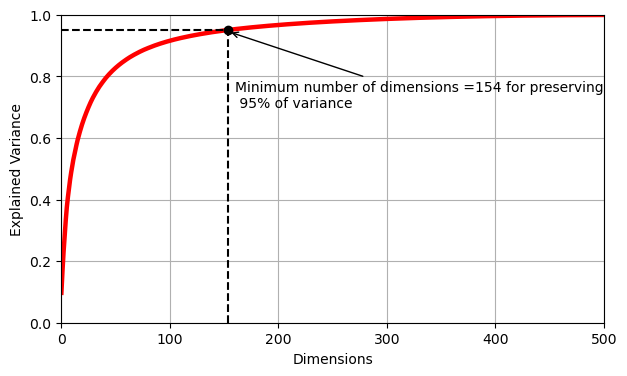

In [95]:
# or we can plot cum_sum to find dimensions required
plt.figure(figsize=(7, 4))
plt.axis([0, 500, 0, 1])
plt.plot(cum_sum,'r-',linewidth=3.2)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([dims, dims], [0, 0.95], "k--")
plt.plot([0, dims], [0.95, 0.95], "k--")
plt.plot(dims, 0.95, "ko")
plt.annotate(f"Minimum number of dimensions ={dims} for preserving\n 95% of variance ",
             xy=(154, 0.945), xytext=(160, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid()
plt.show()

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(PCA(),
                        RandomForestClassifier())

In [104]:
rs_cv = RandomizedSearchCV(
    pipeline,[
        {'pca__n_components':np.arange(5,75),
         'randomforestclassifier__n_estimators':np.arange(55,505)}],
    n_iter=11,cv=3
)
rs_cv.fit(x_train[:990],y_train[:990])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=11,
                   param_distributions=[{'pca__n_components': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 6...
       406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
       419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431,
       432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444,
       445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457,
       458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470,
       471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483,
       484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496,
       497, 498, 499, 500, 501, 502, 503, 504])}])

In [105]:
rs_cv.best_params_

{'randomforestclassifier__n_estimators': 482, 'pca__n_components': 46}

In [107]:
rs_cv.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=46)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=482))])

In [108]:
rs_cv.best_score_

0.8545454545454545

In [ ]:
'''Conclusion: I reduced a 784 (28*28) dimensional dataset to just 46 
dimensions! This is in part relatied to using a random forest,
which is a powerful model'''